# Lab 3: Clustering and Manifold Learning

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")

In [3]:
data = np.array(df.values, dtype=float)

In [4]:
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### B. Rescale the Data
Here we rescale the values in each column to the interval $[0,1]$ with MinMaxScaler. Please note that if your dataset is already prepared for ML there is no need to rescale it again. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative rescaling techniques. In your work on this exercise experiment with other rescaling techniques to see if they lead to a more insightful clustering.

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [7]:
k = 4

In [8]:
### D. K-Means Clustering
# The following k values were tested:
#      k=3: There was not much variation in the values between clusters.
#      k=4: Very few null values, and some nice variation in non-null values.
#      k=5: Some null values, and some nice variation in non-null values.
#      k=6: Seems to have some nice variaty, but a lot more values than in k=5.

# Thus, assuming we want to avoid null values, k=4 appears to be the best value of k to choose.

#### Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

In [9]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

Append the cluster centers to the dataset.

In [10]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [11]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

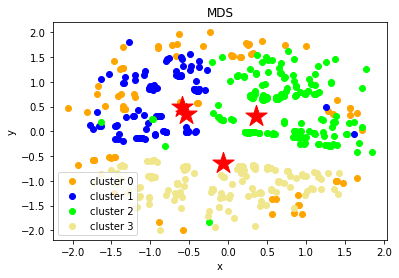

In [12]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [13]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

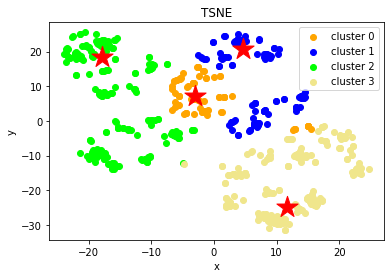

In [14]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [15]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [16]:
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,1
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,2
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,2
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,2
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,1


In [17]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,1
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,2
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,2
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,2
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,0


#### Compute the mean value of each attribute for each cluster

In [18]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.268293,0.883670,1.067517,0.721037,0.000000,0.768293,0.036585,0.646341,0.000000,0.146341,0.012195,0.304878,0.317073,0.365854,0.000000,0.820308
1,0.078261,0.876531,0.994480,0.735870,0.991304,0.643478,0.008696,0.000000,0.008696,0.104348,0.078261,0.191304,0.000000,0.513043,0.686957,0.787636
2,0.341270,0.939537,1.120835,0.691310,0.990476,0.938095,0.023810,1.000000,0.000000,0.133333,0.061905,0.219048,0.000000,0.538095,0.780952,0.915438
3,0.239936,0.928601,1.079824,0.720169,0.980676,0.748792,0.019324,0.652174,0.009662,0.144928,0.043478,0.198068,1.000000,0.000000,0.864734,0.867650


In [19]:
### Task 2

#### Conclusion

By looking at the table above we can argue that:
* LoanAmount is the highest in Cluster 3, and the lowest in Cluster 2.
* The number of dependents in Cluster 2 is drastically lower than what is seen in the other Clusters.
* The Credit_History in Cluster 1 is significantly lower than is what is seen in the other Clusters.
* Cluster 2 seems to have a much lower percentage of male participants than the other Clusters. The ratio of male participants is more consistent with the other Clusters.
* The ratio of maried participants varies greatly among the participants, there is approcimately a 20% gap between the different Clusters.
* The percentage of participants that are not college graudates is higher in Cluster 2, as opposed to the other Clusters.
* There are two null values in the Property_Area_Urban column, this may indicate that there are no urban residents included in the Clusters 2 and 3. All participants in Cluster 0 seem to live in urban areas.

_Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order._

In [20]:
#### Task 3

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [22]:
sse = {}
for k in range(1, 4):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

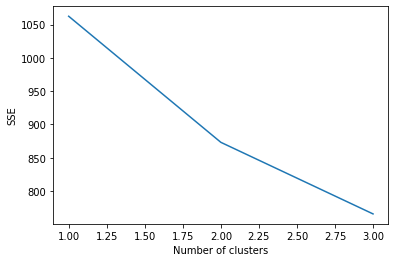

In [23]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
### Task 4
# Another clustering algorithm, a Silhouette Coefficient Method.

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [26]:
#df = pd.DataFrame(data, columns=feature_names)
#df['target'] = data.target

In [27]:
X = data
y = data

In [28]:
k_mean_values = {}

In [29]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    k_mean_values[n_cluster] = sil_coeff

For n_clusters=2, The Silhouette Coefficient is 0.18654028464861305
For n_clusters=3, The Silhouette Coefficient is 0.1915495261821749
For n_clusters=4, The Silhouette Coefficient is 0.19556281999438843
For n_clusters=5, The Silhouette Coefficient is 0.19789126245687408
For n_clusters=6, The Silhouette Coefficient is 0.20026259940201013
For n_clusters=7, The Silhouette Coefficient is 0.2268244448923713
For n_clusters=8, The Silhouette Coefficient is 0.21813425525748126
For n_clusters=9, The Silhouette Coefficient is 0.2363550587679505
For n_clusters=10, The Silhouette Coefficient is 0.2122529530778419


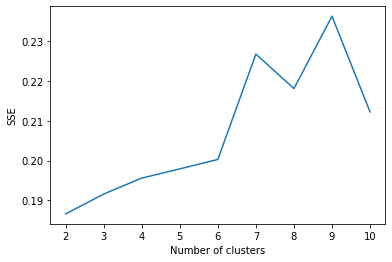

In [30]:
plt.figure()
plt.plot(list(k_mean_values.keys()), list(k_mean_values.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [31]:
# Testing out with the Hierarchical Clustering

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 

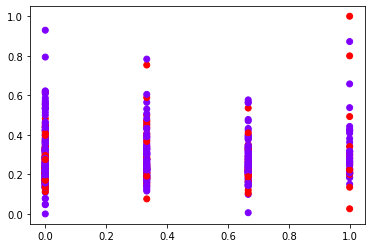

In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [33]:
# Working with the Spectral Embedding

In [34]:
print(__doc__)
from time import time

import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets

Automatically created module for IPython interactive environment


In [35]:
X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

In [36]:
np.random.seed(0)

In [37]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=2, n_neighbors=15)
X_se = se.fit_transform(data)

In [38]:
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.01s
average :	0.00s
complete :	0.00s
single :	0.00s


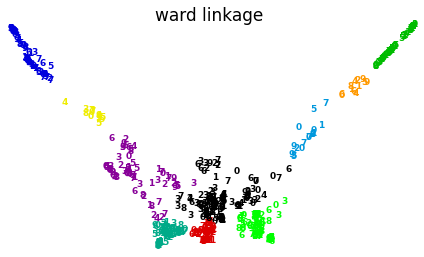

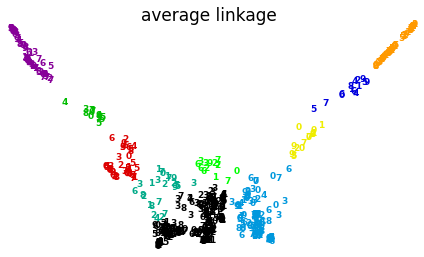

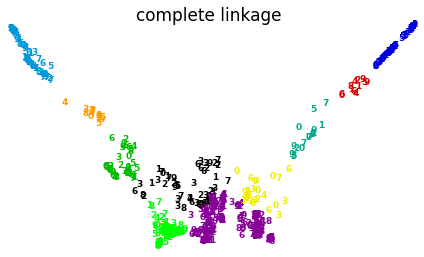

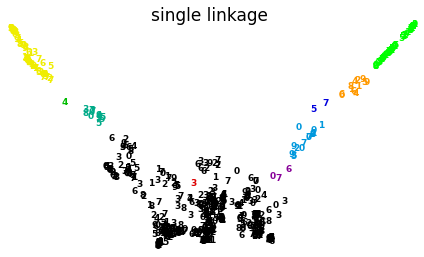

In [39]:
#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = X_se
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

In [40]:
plt.show()